# Lecture 11 - Eigenvalue equations

Previously we looked at systems of linear equations,
$$
\pmb{A}\vec{x} = \vec{b} 
$$
for $\vec{x}$, where $\pmb{A}$ and $\vec{b}$ are known. The solution is of course $\vec{x}=\pmb{A}^{-1}\vec{b}$.

Now consider the matrix equation
$$
\pmb{A}\vec{x} = \lambda\vec{x} 
$$
where $\vec{x}$ is an unknown vector and $\lambda$ an unknown paramter. 

The the direct solution  $\vec{x}=\pmb{A}^{-1}\vec{b}$ will not be of much help beuase the vector $\vec{b}=\lambda\vec{x}$ is not known because contains the unknowns $\lambda$ and $\vec{x}$. This is a eignevalue problem, and it's harder to solve because solutions only exists for certain values of $\lambda$, which need to be determined first. 

Tranforming an [eignevalue problem][3] into one of linear problem can be done:
$$
\left[ \pmb{A}-\lambda\pmb{I}\right]\vec{x}=0
$$
but the only solution here is $\vec{x}=0$. A more interesting solution requires the existence of a condition that forbids us from multiplying both sides of the linear equation by $\left[ \pmb{A}-\lambda\pmb{I}\right]^{-1}$. That condition is the nonexistence of the inverse, and if you recall that Cramer’s rule for the inverse requires division by $\mathrm{det}\left[ \pmb{A}-\lambda\pmb{I}\right]$, it is clear that the inverse fails to exist
(and in this way eigenvalues do exist) when
$$
\mathrm{det}\left[ \pmb{A}-\lambda\pmb{I}\right]=0
$$
The $\lambda$ values that satisfy this secular equation are the eigenvalues.

For a $N\times N$ matrix ther are $N$ eigenvalues $\lambda$ and eigenvectors $\vec{x}$. To see how to solve an eigenvalue equation we construct a matirx form the column-oriented eigenvectors;
$$
\pmb{A}\pmb{X}=\pmb{X}\pmb{\Lambda}
$$
where $\pmb{\Lambda}$ is a diagonal matrix with the eigenvalues on the diagonal, and $\pmb{X}^{T}\pmb{X}=I$

The most widely used technique for calculating eigenvalues is [QR-decomposition][1]
$$\pmb{A}=\pmb{Q}\pmb{R}$$
where $\pmb{Q}$ is an orthongal matrix, and $\pmb{R}$ is an upper triangular matrix. [Diagonalization of][2] $\pmb{A}$ occurs through repeated changes of the basis vector, through iterations;
$$
\begin{array}{}
\pmb{A}_k&=&\pmb{Q}_k\pmb{R}_k\\
\pmb{A}_{k+1}&=&\pmb{R}_k\pmb{Q}_k=\pmb{Q}_k^T\pmb{A}_k\pmb{Q}_k
\end{array}
$$
when the off-diagonal emlemts of $\pmb{A}_k$ are sufficiently small, $\pmb{\Lambda}\approx\pmb{A}_k$ and $\pmb{X}=\prod_{k}\pmb{Q}_k$.

[1]: https://en.wikipedia.org/wiki/QR_decomposition
[2]: https://en.wikipedia.org/wiki/QR_algorithm
[3]: https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors#Applications

#### Example 1

The `scipy` function for QR decomposition is [`scipy.linalg.qr`][1]. 

Create a $5\times5$ matrix of random numbers ([`numpy.random.randn`]) and take it's QR decomposition. Verify that $R$ is an upper triangular matrix and $Q$ is an orthogonal matrix. 
    
[1]: https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.linalg.qr.html
[2]: https://docs.scipy.org/doc/numpy/reference/random/generated/numpy.random.mtrand.RandomState.randn.html

In [55]:
import numpy
import numpy.random
import scipy.linalg

A = numpy.random.randn(5,5) # Make random matrix
Q, R = scipy.linalg.qr(A) # Decompose into QR decomposition
print(Q.shape, R.shape) # Check the shape
print("A = QR :", numpy.allclose(A, numpy.dot(Q, R))) # Make sure QR ~ A
print("Q orthogonal :",numpy.isclose(0.0,numpy.dot(Q[:,0],Q[:,1]))) # Make sure columns of Q are orthogonal
print("R : \n", R)
print("Q : \n", Q)

(5, 5) (5, 5)
A = QR : True
Q orthogonal : True
R : 
 [[-1.8076357   0.01046385 -1.42165175 -0.01828878 -1.19640662]
 [ 0.         -1.37341973  1.06370693  0.26491544  1.05236835]
 [ 0.          0.         -0.68061207  1.31593172  0.91142867]
 [ 0.          0.          0.          2.4253053  -1.69155358]
 [ 0.          0.          0.          0.         -0.5377897 ]]
Q : 
 [[-0.21275764 -0.47709357  0.84841448  0.08546217  0.00223634]
 [-0.44852404 -0.62816879 -0.41744718 -0.47945517  0.00952598]
 [-0.09467335 -0.2845266  -0.2491094   0.66559221 -0.63640639]
 [-0.79251649  0.33128876 -0.04942224  0.35758849  0.36311607]
 [ 0.34134284 -0.43252522 -0.20355017  0.43810551  0.68046887]]


#### Example 2
Use the `scipy.linalg.eigh` function to find the eigenvalues and eignevectors of the matrix
$$\begin{bmatrix}
1 & 2 \\
2 & 1
\end{bmatrix}$$

Test the orthogonality and normality of the eigenvectors.

In [56]:
A = numpy.array([[1,2],[2,1]],dtype=float)
x, V = scipy.linalg.eigh(A)
print(x)
print(V)
print("Eiegnvectors are orthogonal: ", numpy.allclose(0, numpy.dot(V[:,0], V[:,1])))
print("Eiegnvectors are normal: ", numpy.allclose(1, scipy.linalg.norm(V[:,0])))

[-1.  3.]
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
Eiegnvectors are orthogonal:  True
Eiegnvectors are normal:  True


#### Example 3

Google's early success as a search engine was due to their clever use of eigenvalues and eigenvectors. The PageRank method of deilvering relevant search results was a revolution in the early days fo the web. (It has evolved well beyond this simple example here.)

Let's assume the world wide web contains 6 pages only. The author of Page 1 thinks pages 2, 4, 5, and 6 have good content, and links to them. The author of Page 2 only likes pages 3 and 4 so only links from her page to them. The links between these and the other pages in this simple web are summarised in this diagram.

<img src="./images/pagerank.svg"/>

Google engineers assumed each of these pages is related in some way to the other pages, since there is at least one link to and from each page in the web. Their task was to find the *most important* page for a particular search query, as decided by the writers of all 6 pages. 

For the 6-page web illustrated above, we can form a "link matrix" representing the relative importance of the links in and out of each page.

Considering Page 1, it has 4 outgoing links (to pages 2, 4, 5, and 6). So in the first column of our "links matrix", we place value $\frac{1}{4}$ in each of rows 2, 4, 5 and 6, since each link is worth $\frac{1}{4}$ of all the outgoing links. The rest of the rows in column 1 have value $0$, since Page 1 doesn't link to any of them. We continue the same process for the rest of the 6 pages.
$$A =
\begin{bmatrix}
    0           & 0           & 0 & 0 & \frac{1}{2} & 0 \\
    \frac{1}{4} & 0           & 0 & 0 & 0           & 0 \\
    0           & \frac{1}{2} & 0 & 0 & 0           & 0 \\
    \frac{1}{4} & \frac{1}{2} & 0 & 0 & \frac{1}{2} & 0 \\
    \frac{1}{4} & 0           & 1 & 1 & 0           & 1 \\
    \frac{1}{4} & 0           & 0 & 0 & 0           & 0 
\end{bmatrix}
$$
- What are the eigenvalues of this matrix?

In [57]:
A=numpy.array([[0,0,0,0,1/2,0],
               [1/4,0,0,0,0,0],
               [0,1/2,0,0,0,0],
               [1/4,1/2,0,0,1/2,0],
               [1/4,0,1,1,0,1],
               [1/4,0,0,0,0,0]],dtype=float)
x, v = scipy.linalg.eig(A)
print(x)

[ 1.00000000e+00+0.j         -1.39845075e-01+0.39240258j
 -1.39845075e-01-0.39240258j -7.20309850e-01+0.j
  2.96003466e-17+0.j         -2.47220661e-17+0.j        ]


We can only use non-negative, real values of eigenvlaues (since they are the only ones that will make sense in this context), so we conclude $\lambda=1$. (In fact, for such PageRank problems we always take $\lambda=1$.)

- What is the eigenvector for this eigenvalue?

In [58]:
print(-numpy.real(v[:,0]))

[-0.37712362 -0.0942809  -0.04714045 -0.51854497 -0.75424723 -0.0942809 ]


We see that page 5 has the highest PageRank score, and therefore is the most authoritative and relevant on the search topic. It should be listed first in the search results.

#### Example 4
A matrix $A$ with distinct eigenvalues has eigenvectors which are linearly independent. If we form a matrix $P$ whose columns are these eigenvectors, it can be shown that $\det(P) \neq 0$ so that $P^{-1}$ exists. Also, $P^{-1}P=I$.

The product $P^{-1}AP=D$ is then a diagonal matrix $D$ whose diagonal elements are the eigenvalues of $A$. Likewise, $A=PDP^{-1}$. 

Then we can calculate the power of matrix $A^k$ by noting
$$
A^k=(PDP^{-1})(PDP^{-1})\ldots(PDP^{-1}) = PD^{k}P^{-1}
$$

- Show what happens when we try this method of calculating a matrix $A^{50}$, versus using the the function [`numpy.linalg.matrix_power'][1]

[1]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.matrix_power.htm

In [78]:
# A = numpy.array([[2,3],[3,2]],dtype=float)
A=numpy.random.rand(50,50)

d,P = scipy.linalg.eig(A)
D = numpy.dot(scipy.linalg.inv(P),numpy.dot(A,P))
# print(f"Eigenvalues of A : {d}")
# print(f"Diagonal of Pinv.A.P : {numpy.diagonal(D)}" )

# Find A^50 with P.D^50.Pinv
D50 = numpy.power(D,50)
A50 = numpy.dot(P,numpy.dot(D50,scipy.linalg.inv(P)))
# print(f"A^50 :", A50)
print(f"The first five elements of A^50 :", A50[0,1:5])


# Find A^50 with matrix_power
# NO! A50 = numpy.power(A,50)
# THAT WOULD CALCULATE THE ELEMENT-BY-ELEMENT POWER!
#
# MUST USE MATRIX_POWER INSTEAD.
A50 = numpy.linalg.matrix_power(A,50)
# print(f"A^50 :", A50)
print(f"The first five elements of A^50 :", A50[0,1:5])

The first five elements of A^50 : [3.43528559e+68-1.23540588e+54j 2.89734083e+68+2.13713823e+53j
 2.94018253e+68-5.52266038e+53j 2.78633029e+68-3.35088374e+53j]
The first five elements of A^50 : [3.43528559e+68 2.89734083e+68 2.94018253e+68 2.78633029e+68]


In calculating the matrix $D$, we see that there is a small rounding error in the imaginary part of some of the eigenvalues. When raised to the fiftieth power, these error accumulate. This is best seen in a very large array.

#### Example 5
Consider the matrix
$$\begin{bmatrix}
\alpha & \beta \\
-\beta & \alpha
\end{bmatrix}$$
 where $\alpha$ and $\beta$ whatever values you want. Use a numerical eigenproblem solver to show that the eigenvalues and eigenvectors are the complex conjugates 
$$
\vec{x}=\left(
\begin{array}{}\pm i\\ +1\end{array}
\right)
\ ,\lambda=\alpha\mp i\beta
$$

In [60]:
alpha = 1.0
beta  = 2.0

A = numpy.array([[alpha,beta],[-beta,alpha]])
evl, evc=scipy.linalg.eig(A)

# Print out the first eigenvector
print(f"Eigenvalue  1 : {evl[0]:1.2f}")
print("Eigenvector 1 :", evc[:,0])
# Here is the expected answer
x2 = numpy.array([-1.j,1.],dtype=complex)
n=scipy.linalg.norm(x2)
x2 /= n
print(f"Eigenvalue  A : {complex(alpha,beta)}")
print("Eigenvector A :", x2)

print("")

# Print out the second eigenvector
print(f"Eigenvalue  2 : {evl[1]:1.2f}")
print("Eigenvector 2 :", evc[:,1])
# Here is the expected answer
x1 = numpy.array([1.j,1.],dtype=complex)
n=scipy.linalg.norm(x1)
x1 /= n
print(f"Eigenvalue  A : {complex(alpha,-beta)}")
print("Eigenvector A :", x1)

Eigenvalue  1 : 1.00+2.00j
Eigenvector 1 : [0.        -0.70710678j 0.70710678+0.j        ]
Eigenvalue  A : (1+2j)
Eigenvector A : [-0.        -0.70710678j  0.70710678+0.j        ]

Eigenvalue  2 : 1.00-2.00j
Eigenvector 2 : [0.        +0.70710678j 0.70710678-0.j        ]
Eigenvalue  A : (1-2j)
Eigenvector A : [0.        +0.70710678j 0.70710678+0.j        ]


In [61]:
import numpy
import scipy.constants
import scipy.linalg
%matplotlib inline
import matplotlib.pyplot as plot

In [62]:
scipy.constants.hbar

1.0545718176461565e-34

In [63]:
# Infiite square well from 0 -> L
# Potential floor is not flat
# V(x) = 
# infinity for x <= 0
# bx/L for 0 < x < L
# infinitiy for x > L

b    = 10.        # floor height (eV)
L    = 5.0E-10    # well width (m)
me   = 9.1094E-31 # electron mass (kg)
j2ev = 1.6022E-19 # 1 eV = 1.6021E-19 J
N    = 100

H = numpy.zeros((N,N),dtype=float)
for n in range(1,N+1) :
    for m in range(1,N+1) :
        if (m != n) :
            if (m%2==0) and (n%2==0) :
                H[n-1,m-1] = 0.
            elif (m%2!=0) and (n%2!=0) :
                H[n-1,m-1] = 0.
            else :
                H[n-1,m-1] = ((-8.*b)/(numpy.pi**2))*((m*n)/(m**2-n**2)**2)
        else :
            H[n-1,m-1] = (b/2.) +(numpy.pi*(scipy.constants.hbar**2)*(n**2))/(2*(L**2)*me*j2ev)

In [64]:
print(H)

[[ 5.47876863e+00 -1.80126549e+00  0.00000000e+00 ... -8.61395224e-06
   0.00000000e+00 -8.10731607e-06]
 [-1.80126549e+00  6.91507454e+00 -1.94536673e+00 ...  0.00000000e+00
  -1.67212683e-05  0.00000000e+00]
 [ 0.00000000e+00 -1.94536673e+00  9.30891771e+00 ... -2.58849669e-05
   0.00000000e+00 -2.43609140e-05]
 ...
 [-8.61395224e-06  0.00000000e+00 -2.58849669e-05 ...  4.60309396e+03
  -2.02637146e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.67212683e-05  0.00000000e+00 ... -2.02637146e+00
   4.69741138e+03 -2.02637250e+00]
 [-8.10731607e-06  0.00000000e+00 -2.43609140e-05 ...  0.00000000e+00
  -2.02637250e+00  4.79268634e+03]]


In [65]:
numpy.allclose(H, H.T)

True

In [66]:
evals, evecs = scipy.linalg.eigh(H)

In [67]:
print(evals)

[3.95804166e+00 6.93484017e+00 9.62820765e+00 1.29014744e+01
 1.71329588e+01 2.23517828e+01 2.85459045e+01 3.57076705e+01
 4.38330280e+01 5.29197477e+01 6.29665338e+01 7.39725940e+01
 8.59374230e+01 9.88606860e+01 1.12742155e+02 1.27581669e+02
 1.43379114e+02 1.60134406e+02 1.77847481e+02 1.96518291e+02
 2.16146801e+02 2.36732982e+02 2.58276810e+02 2.80778268e+02
 3.04237342e+02 3.28654019e+02 3.54028291e+02 3.80360149e+02
 4.07649586e+02 4.35896598e+02 4.65101178e+02 4.95263325e+02
 5.26383033e+02 5.58460300e+02 5.91495125e+02 6.25487503e+02
 6.60437435e+02 6.96344918e+02 7.33209951e+02 7.71032532e+02
 8.09812660e+02 8.49550335e+02 8.90245556e+02 9.31898322e+02
 9.74508631e+02 1.01807648e+03 1.06260188e+03 1.10808482e+03
 1.15452530e+03 1.20192332e+03 1.25027889e+03 1.29959200e+03
 1.34986264e+03 1.40109083e+03 1.45327656e+03 1.50641982e+03
 1.56052063e+03 1.61557898e+03 1.67159486e+03 1.72856829e+03
 1.78649926e+03 1.84538776e+03 1.90523380e+03 1.96603739e+03
 2.02779851e+03 2.090517

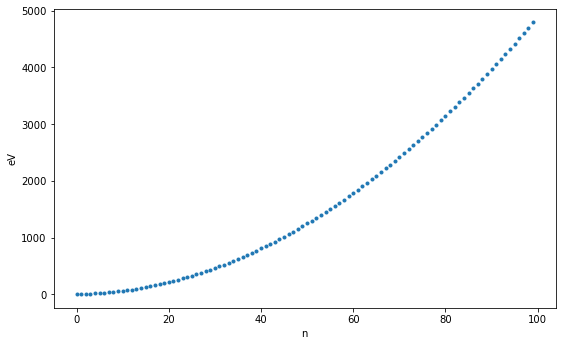

In [79]:
plot.figure(figsize=(9,5.5))
plot.plot(numpy.real(evals), ".")
plot.xlabel("n")
plot.ylabel("eV")
plot.show()
plot.close()

In [69]:
print(evecs)

[[ 7.39860375e-01  6.26303929e-01  2.39151305e-01 ...  1.87354132e-09
  -6.93222089e-12  1.69365921e-09]
 [ 6.18467278e-01 -4.89967176e-01 -5.90049705e-01 ... -1.48486541e-11
   3.56420298e-09 -8.22169586e-11]
 [ 2.52930187e-01 -5.69914513e-01  5.89472078e-01 ...  5.63469473e-09
  -2.08610430e-11  5.09319283e-09]
 ...
 [ 3.07078469e-09 -2.61454183e-09  5.07108325e-09 ... -9.99533366e-01
   2.14792880e-02 -2.35929606e-04]
 [ 2.84915500e-09 -3.36029132e-09  1.74410733e-09 ... -2.14796243e-02
  -9.99542864e-01  2.12592709e-02]
 [ 2.77438659e-09 -2.36152771e-09  4.58242932e-09 ... -2.03411575e-04
  -2.12596223e-02 -9.99773633e-01]]


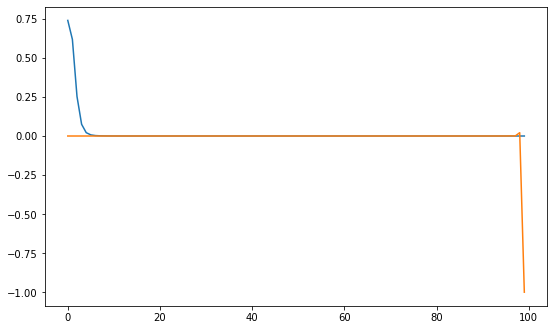

In [80]:
plot.figure(figsize=(9,5.5))
plot.plot(evecs[:,0]) # Mostly the first few sin functions
plot.plot(evecs[:,99]) # Mostly just the last sin function
plot.show()
plot.close()

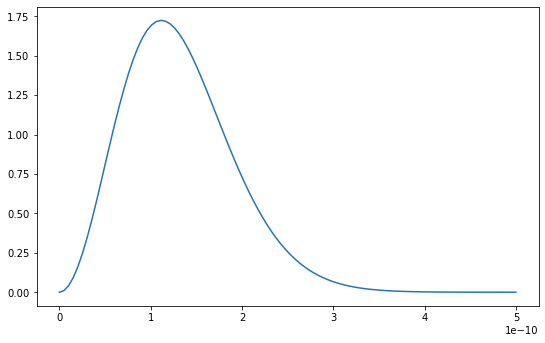

In [84]:
n_plot_points = 100
x_plot_points = numpy.linspace(0,L,n_plot_points,endpoint=True)
y_plot_points = numpy.zeros(n_plot_points)

for x in range(n_plot_points) :
    for n in range(N) :
        y_plot_points[x] +=  evecs[n, 0]*numpy.sin(numpy.pi*(n+1)*x_plot_points[x]/L)
        # Ground state       -> state 0 (change the 0 to find excited states)

plot.figure(figsize=(9,5.5))
plot.plot(x_plot_points,y_plot_points**2)
plot.show()
plot.close()